In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df=pd.read_csv("HR-DATA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [3]:
columns=df[[ "BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]]
data = pd.get_dummies(columns)

del df["BusinessTravel"]
del df["Department"]
del df["EducationField"]
del df["Gender"]
del df["JobRole"]
del df["MaritalStatus"]
del df["Over18"]
del df["OverTime"]



In [4]:
df=pd.concat([df, data], axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
5,32,No,1005,2,2,1,8,4,79,3,...,0,0,0,0,0,0,1,1,1,0
6,59,No,1324,3,3,1,10,3,81,4,...,0,0,0,0,0,1,0,1,0,1
7,30,No,1358,24,1,1,11,4,67,3,...,0,0,0,0,1,0,0,1,1,0
8,38,No,216,23,3,1,12,4,44,2,...,0,0,0,0,0,0,1,1,1,0
9,36,No,1299,27,3,1,13,3,94,3,...,0,0,0,0,0,1,0,1,1,0


In [5]:
import copy
X=copy.deepcopy(df)
del X["Attrition"]
y=copy.deepcopy(df["Attrition"])


In [43]:
x_train,x_test, y_train, y_test= train_test_split(X,y,test_size=0.3, shuffle=True)

lr=LogisticRegression()
lr.fit(x_train, y_train)

predict=lr.predict(x_test)

print(accuracy_score(predict, y_test))

print(classification_report(predict, y_test))

C:\Users\ABHISHEK MITTAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.891156462585034
              precision    recall  f1-score   support

          No       0.98      0.90      0.94       410
         Yes       0.37      0.81      0.51        31

    accuracy                           0.89       441
   macro avg       0.68      0.85      0.72       441
weighted avg       0.94      0.89      0.91       441



In [6]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)
#clf_smote = sklearn.svm.LinearSVC().fit(X_resampled, y_resampled)
#clf_smote

(1470, 55)
(1470,)
(2466, 55)
(2466,)


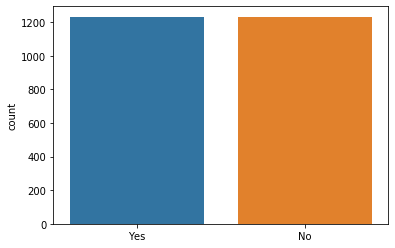

In [10]:
sns.countplot(y_resampled)

In [11]:
x_train,x_test, y_train, y_test= train_test_split(X_resampled,y_resampled,test_size=0.3, shuffle=True)

lr=LogisticRegression()
lr.fit(x_train, y_train)

predict=lr.predict(x_test)

print(accuracy_score(predict, y_test))

print(classification_report(predict, y_test))

print(confusion_matrix(predict, y_test))

C:\Users\ABHISHEK MITTAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9337837837837838
              precision    recall  f1-score   support

          No       0.95      0.92      0.93       384
         Yes       0.91      0.95      0.93       356

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

[[352  32]
 [ 17 339]]


In [12]:
y_test

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 

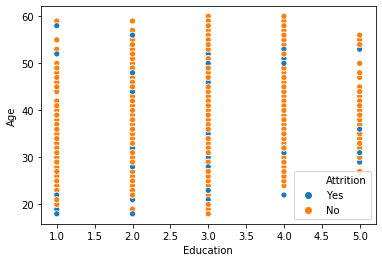

In [47]:
x1=sns.scatterplot(x=df["Education"], y=df["Age"], hue=df["Attrition"] )
plt.legend(loc='lower right')

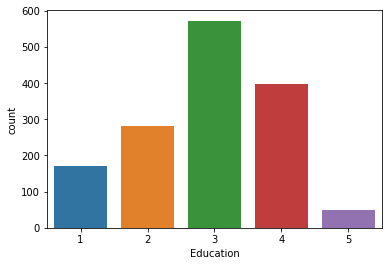

In [48]:
sns.countplot(x=df["Education"])

In [49]:
import imblearn.over_sampling 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test, y_train, y_test= train_test_split(X_resampled,y_resampled,test_size=0.3, shuffle=True)

kn =  KNeighborsClassifier(n_neighbors=1)  
kn.fit(x_train, y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
predict = kn.predict(x_test)

In [47]:

print(accuracy_score(predict, y_test))

print(classification_report(predict, y_test))

print(kn.score(x_test, y_test))

print(confusion_matrix(predict, y_test))

0.845945945945946
              precision    recall  f1-score   support

          No       0.75      0.92      0.83       299
         Yes       0.94      0.79      0.86       441

    accuracy                           0.85       740
   macro avg       0.85      0.86      0.84       740
weighted avg       0.86      0.85      0.85       740

0.845945945945946
[[276  23]
 [ 91 350]]


In [8]:
from flask import Flask
from flask import Flask
import json
from flask import request, jsonify, Response
from flask import Blueprint
import pandas as pd

In [9]:
app = Flask(__name__)

In [10]:
predict=""
df1 = pd.DataFrame()
@app.route("/EnterData",methods=['POST'])
def taking_entry():
    global df
    global predict
    global df1
    data=request.get_json()
    
    df=pd.read_csv("HR-Data.csv")
    del df["Attrition"]
    
    #df1=pd.DataFrame({"Age":[data['Age']],"BusinessTravel":[data['BusinessTravel']],"DailyRate":[data['DailyRate']],"Department":[data['Department']],"DistanceFromHome":[data['DistanceFromHome']],"EducationField":[data['EducationField']],"EmployeeCount":[data['EmployeeCount']],"EmployeeNumber":[data['EmployeeNumber']],"Gender":[data['Gender']],"HourlyRate":[data['HourlyRate']],"JobInvolvement":[data['JobInvolvement']],"JobLevel":[data['JobLevel']],"JobRole":[data['JobRole']],"JobSatisfaction":[data['JobSatisfaction']],"MaritalStatus":[data['MaritalStatus']],"MonthlyIncome":[data['MonthlyIncome']],"MonthlyRate":[data['MonthlyRate']],"NumCompaniesWorked":[data['NumCompaniesWorked']],"Over18":[data['Over18']],"OverTime":[data['OverTime']],"PercentSalaryHike":[data['PercentSalaryHike']],"PerformanceRating":[data['PerformanceRating']],"RelationshipSatisfaction":[data['RelationshipSatisfaction']],"StandardHours":[data['StandardHours']],"StockOptionLevel":[data['StockOptionLevel']],"TotalWorkingYears":[data['TotalWorkingYears']],"TrainingTimesLastYear":[data['TrainingTimesLastYear']],"YearsInCurrentRole":[data['YearsInCurrentRole']],"YearsSinceLastPromotion":[data['YearsSinceLastPromotion']],"YearsWithCurrManager":[data['YearsWithCurrManager']]})
    df1=pd.DataFrame([data])
    df=pd.concat([df,df1],axis=0, ignore_index=True)
    columns=df[[ "BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]]
    data_dummy = pd.get_dummies(columns)

    del df["BusinessTravel"]
    del df["Department"]
    del df["EducationField"]
    del df["Gender"]
    del df["JobRole"]
    del df["MaritalStatus"]
    del df["Over18"]
    del df["OverTime"]

    df=pd.concat([df, data_dummy], axis=1, ignore_index=True)
    df.fillna(0,inplace=True)
    rows, columns=df.shape
    predict = lr.predict(df[rows-1:])
    
    return jsonify(data)


@app.route("/Display", methods=['GET'])
def display():
    global predict
    print("Prediction: ", predict)
    rows, columns= df.shape
    print("Probability: ", lr.predict_proba(df[rows-1:])[:,1])
    return jsonify(predict.tolist())

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Jul/2019 12:04:31] "POST /EnterData HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2019 12:04:47] "POST /Display HTTP/1.1" 405 -
127.0.0.1 - - [08/Jul/2019 12:04:52] "GET /Display HTTP/1.1" 200 -


Prediction:  ['Yes']
Probability:  [0.89467973]


In [107]:
x = df[a-1:]

In [108]:
x

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1469,34,No,628,8,3,1,2068,2,82,4,...,0,0,0,0,0,1,0,1,1,0


In [30]:
di={
"TotalWorkingYears":3,
"TrainingTimesLastYear":2,
"WorkLifeBalance":3,
"YearsAtCompany":2,
"YearsInCurrentRole":2,
"YearsSinceLastPromotion":1,
"YearsWithCurrManager":2
}


In [31]:
d= pd.DataFrame([di])

In [32]:
d

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3,2,3,2,2,1,2
